# Predicting Flight Delays with Error Calculation using Machine Learned Classifiers


#### I. Reading and Cleaning
First we read in the data, do some basic cleaning, and display the first few values to check

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'F:\\Projects\\NITPML12 - Predicting Flight Delays with Error Calculation using Machine Learned Classifiers\\DOCUMENTS\\13. Sample code'

In [3]:
pd.set_option('display.max_columns',None)

use_cols = ['YEAR','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 
            'DEP_TIME', 'CRS_DEP_TIME', 'ARR_TIME','CRS_ARR_TIME',
            'UNIQUE_CARRIER','FL_NUM','TAIL_NUM','ACTUAL_ELAPSED_TIME',
            'CRS_ELAPSED_TIME','AIR_TIME','ARR_DELAY','DEP_DELAY',
            'ORIGIN','DEST','DISTANCE','TAXI_IN','TAXI_OUT','CANCELLED',
            'CANCELLATION_CODE','DIVERTED','CARRIER_DELAY',
            'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
            'LATE_AIRCRAFT_DELAY'
]

df = pd.read_csv('F:\\Projects\\NITPML12 - Predicting Flight Delays with Error Calculation using Machine Learned Classifiers\\CODE\\Original Code\\final_data.csv', usecols=use_cols).sample(300000, random_state=44)
df = df[df["MONTH"].isin([10,11,12])]
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4541012,2016,10,9,7,AA,N956AA,2121,BOS,LGA,1100.0,1051,-9.0,11,9.0,1215.0,1204,-11.0,0.0,NaN,0.0,75.0,73.0,53.0,184.0,NaN,NaN,NaN,NaN,NaN
5497445,2016,12,13,2,UA,N17719,1965,MCO,EWR,1151.0,1146,-5.0,11,33.0,1430.0,1423,-7.0,0.0,NaN,0.0,159.0,157.0,113.0,937.0,NaN,NaN,NaN,NaN,NaN
4519037,2016,10,4,2,AA,N3MCAA,1314,TUL,DFW,821.0,815,-6.0,31,12.0,940.0,952,12.0,0.0,NaN,0.0,79.0,97.0,54.0,237.0,NaN,NaN,NaN,NaN,NaN
5518869,2016,12,1,4,VX,N840VA,717,DAL,SFO,1835.0,1826,-9.0,17,8.0,2035.0,2020,-15.0,0.0,NaN,0.0,240.0,234.0,209.0,1476.0,NaN,NaN,NaN,NaN,NaN
5085523,2016,11,1,2,AA,N3EMAA,1056,ORD,EWR,1825.0,1823,-2.0,21,6.0,2131.0,2121,-10.0,0.0,NaN,0.0,126.0,118.0,91.0,719.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(73303, 29)

Here we simply select all the rows with cancelled flights and insert them into their own dataframe

In [5]:
df['TAXI_OUT'].fillna(0, inplace=True)##### needed for later

cancelled = df[df['CANCELLED']==1]

cancelled.tail()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4804804,2016,11,30,3,EV,N11189,4103,RIC,EWR,1428.0,NaN,NaN,0.0,NaN,1600.0,NaN,NaN,1.0,C,0.0,92.0,NaN,NaN,277.0,NaN,NaN,NaN,NaN,NaN
5578943,2016,12,17,6,WN,N8659D,976,OAK,DEN,805.0,NaN,NaN,0.0,NaN,1135.0,NaN,NaN,1.0,B,0.0,150.0,NaN,NaN,957.0,NaN,NaN,NaN,NaN,NaN
5237539,2016,12,19,1,EV,N879AS,2775,DFW,VPS,1215.0,NaN,NaN,0.0,NaN,1410.0,NaN,NaN,1.0,A,0.0,115.0,NaN,NaN,641.0,NaN,NaN,NaN,NaN,NaN
5261151,2016,12,4,7,EV,N12167,4152,ORD,RIC,2050.0,NaN,NaN,0.0,NaN,2354.0,NaN,NaN,1.0,C,0.0,124.0,NaN,NaN,642.0,NaN,NaN,NaN,NaN,NaN
5572626,2016,12,15,4,WN,N923WN,1199,RNO,LAS,1010.0,NaN,NaN,0.0,NaN,1120.0,NaN,NaN,1.0,B,0.0,70.0,NaN,NaN,345.0,NaN,NaN,NaN,NaN,NaN


### II. Exploration
### 1.1 Day of the Week Bar Chart
Here we group both dataframes by the DayOfWeek, and calculate the percentage of cancelled flights for each day of the week and display them in a bar chart

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

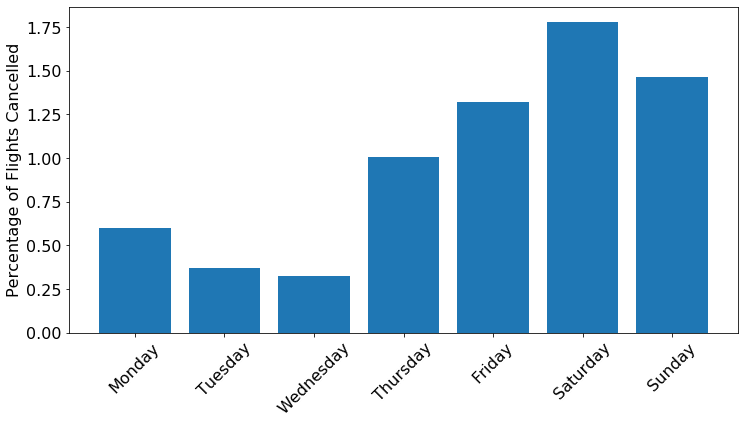

In [6]:
import matplotlib.pyplot as plt

font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_total = df['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

This shows that Monday has the lowest percentage of cancelled flights, and Tuesday has the highest, double that of Monday's percentage.

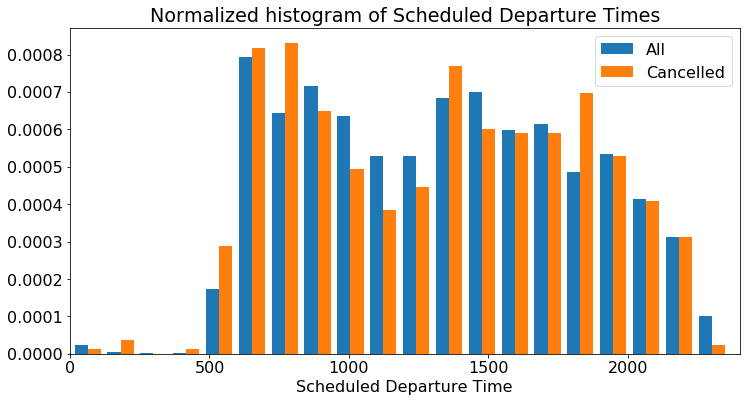

In [7]:
df['CRS_DEP_TIME'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRS_DEP_TIME'], cancelled['CRS_DEP_TIME']], normed=1, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

This shows that early morning and late night flights are slightly more likely to be cancelled

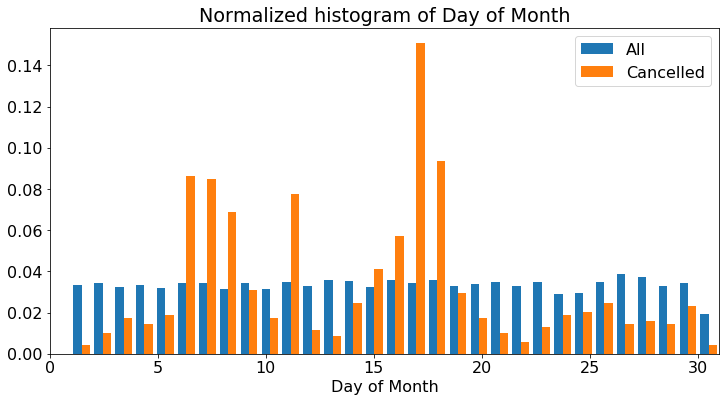

In [8]:
df['DAY_OF_MONTH'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DAY_OF_MONTH'], cancelled['DAY_OF_MONTH']], normed=1, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()